## **Hyperparameter Tuning using Keras Tuner**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./datasets/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.corr()['Outcome'] * 100

Pregnancies                  22.189815
Glucose                      46.658140
BloodPressure                 6.506836
SkinThickness                 7.475223
Insulin                      13.054795
BMI                          29.269466
DiabetesPedigreeFunction     17.384407
Age                          23.835598
Outcome                     100.000000
Name: Outcome, dtype: float64

In [7]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X.shape,y.shape

((768, 8), (768,))

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()

In [19]:
model.add(Dense(32,activation='relu',input_dim=X.shape[1]))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5833 - loss: 12.7500 - val_accuracy: 0.6494 - val_loss: 7.9130
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5995 - loss: 9.0925 - val_accuracy: 0.6429 - val_loss: 3.8925
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5845 - loss: 4.0808 - val_accuracy: 0.4935 - val_loss: 1.9398
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5080 - loss: 2.1329 - val_accuracy: 0.5065 - val_loss: 1.4140
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5639 - loss: 1.5838 - val_accuracy: 0.5649 - val_loss: 1.0709
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5302 - loss: 1.2097 - val_accuracy: 0.5649 - val_loss: 1.0185
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5742 - loss: 0.9220 - val_accuracy: 0.5649 - val_loss: 0.9723
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5793 - loss: 0.9320 - val_accuracy: 0.6169 -

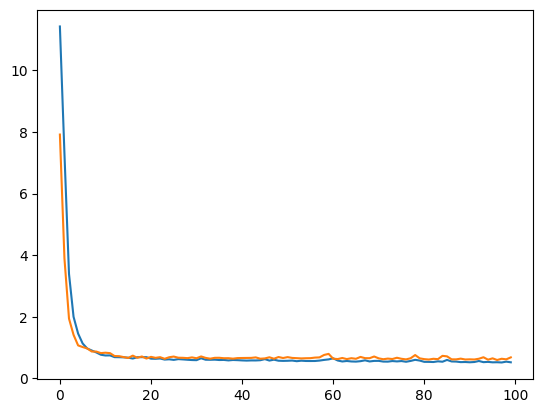

In [21]:
plt.plot(history.history['loss'])    
plt.plot(history.history['val_loss'])    
plt.show()

### **Selection of Optimal Optimizer**

In [25]:
import keras_tuner as kt

In [27]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(
        32,
        activation='relu',
        input_dim=X.shape[1]
    ))
    
    model.add(Dense(
        1,
        activation='sigmoid'
    ))
    
    optimizer = hp.Choice('optimizer',values = ['adam','sgd','rmsprop','adadelta'])
    
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [28]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5
) 

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7077922224998474

Best val_accuracy So Far: 0.7077922224998474
Total elapsed time: 00h 00m 12s


In [39]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
best_model

<Sequential name=sequential, built=True>

In [37]:
best_parameters = tuner.get_best_hyperparameters()[0].values

In [38]:
best_parameters

{'optimizer': 'sgd'}

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [43]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6920 - loss: 0.6054 - val_accuracy: 0.6494 - val_loss: 0.7182
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7046 - loss: 0.5636 - val_accuracy: 0.7403 - val_loss: 0.6176
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7413 - loss: 0.5327 - val_accuracy: 0.6753 - val_loss: 0.7172
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7641 - loss: 0.5017 - val_accuracy: 0.7078 - val_loss: 0.6055
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7094 - loss: 0.5305 - val_accuracy: 0.7532 - val_loss: 0.6160
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7067 - loss: 0.5458 - val_accuracy: 0.6948 - val_loss: 0.6378
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7471 - loss: 0.5192 - val_accuracy: 0.7403 - val_loss: 0.6033
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7053 - loss: 0.5283 - val_accuracy: 0.6

In [44]:
def loss(history):
    plt.plot(history.history['loss'])    
    plt.plot(history.history['val_loss'])    
    plt.show()

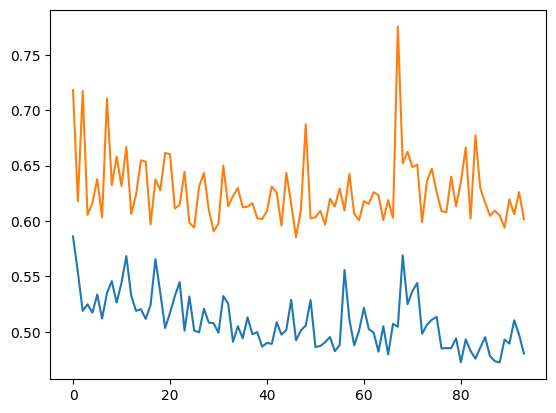

In [45]:
loss(history)

### **Selection of Number of Neurons**

In [52]:
def build_model(hp):
    model = Sequential()
    
    units = hp.Int('units',8,128,step=8)
    
    model.add(Dense(
        units=units,
        activation='relu',
        input_dim=X.shape[1]
    ))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
    
    return model

In [53]:
tuner = kt.RandomSearch(build_model,max_trials=5,objective='val_accuracy',directory='tuners',project_name='hpt')

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7207792401313782
Total elapsed time: 00h 00m 10s


In [57]:
params = tuner.get_best_hyperparameters()[0].values
params

{'units': 24}

In [58]:
model = tuner.get_best_models(num_models=1)[0]

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
history = model.fit(X_train,y_train,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6353 - loss: 0.7140 - val_accuracy: 0.4221 - val_loss: 1.1219
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6368 - loss: 0.6692 - val_accuracy: 0.5519 - val_loss: 0.6868
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6770 - loss: 0.6274 - val_accuracy: 0.6169 - val_loss: 0.6805
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6474 - loss: 0.6409 - val_accuracy: 0.7273 - val_loss: 0.6780
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6999 - loss: 0.6055 - val_accuracy: 0.6883 - val_loss: 0.6239
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6632 - loss: 0.6204 - val_accuracy: 0.6299 - val_loss: 0.7006
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6807 - loss: 0.6095 - val_accuracy: 0.6558 - val_loss: 0.6462
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6328 - loss: 0.6249 - val_accuracy: 0.

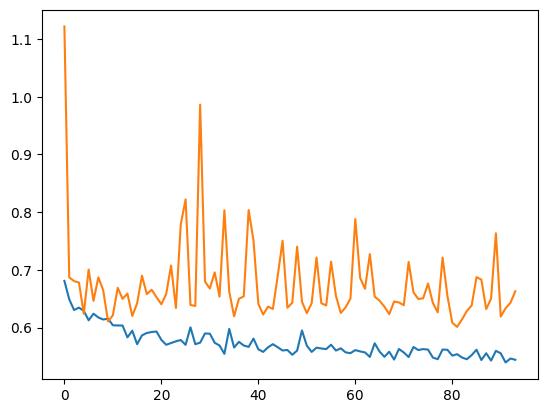

In [60]:
loss(history)

### **Selecting Optimum Number of Layers**

In [61]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(24,activation='relu',input_dim=X.shape[1]))
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(24,activation='relu'))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model         

In [62]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='tuners',project_name='num_layers')

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6623376607894897

Best val_accuracy So Far: 0.6818181872367859
Total elapsed time: 00h 00m 19s


In [64]:
model = tuner.get_best_models(num_models=1)[0]

params = tuner.get_best_hyperparameters()[0].values

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
params

{'num_layers': 4}

In [66]:
model.fit(X_train,y_train,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6970 - loss: 0.6165 - val_accuracy: 0.6623 - val_loss: 0.6279
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6769 - loss: 0.6081 - val_accuracy: 0.6688 - val_loss: 0.6585
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6761 - loss: 0.6066 - val_accuracy: 0.6558 - val_loss: 0.6604
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6564 - loss: 0.6231 - val_accuracy: 0.6818 - val_loss: 0.6322
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6863 - loss: 0.6036 - val_accuracy: 0.6688 - val_loss: 0.6325
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7209 - loss: 0.5615 - val_accuracy: 0.6623 - val_loss: 0.6341
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6870 - loss: 0.6066 - val_accuracy: 0.6364 - val_loss: 0.6690
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6757 - loss: 0.5977 - val_accuracy: 0.

In [80]:
from keras.layers import Dropout

In [81]:
def build_model(hp):
    model = Sequential()
    
    counter = 0
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter == 0:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8,max_value=128,step=8),
                activation=hp.Choice('activation' + str(i), values=['relu','tanh','sigmoid']),
                input_dim=X.shape[1]
            ))  
            model.add(Dropout(hp.Choice('dropout',values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:                
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8,max_value=128,step=8),
                activation=hp.Choice('activation' + str(i), values=['relu','tanh']),
            ))  
            model.add(Dropout(hp.Choice('dropout',values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        
        counter += 1   
        
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizers',values=['adam','sgd','rmsprop','nadam','adadelta']),loss='binary_crossentropy',metrics=['accuracy'])
    
    return model                  

In [82]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='tuners',project_name='complete')

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6298701167106628

Best val_accuracy So Far: 0.701298713684082
Total elapsed time: 00h 00m 46s


In [84]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units0': 88,
 'activation0': 'tanh',
 'dropout': 0.2,
 'optimizers': 'rmsprop',
 'units1': 112,
 'activation1': 'tanh',
 'units2': 72,
 'activation2': 'relu',
 'units3': 80,
 'activation3': 'tanh',
 'units4': 128,
 'activation4': 'relu',
 'units5': 56,
 'activation5': 'tanh',
 'units6': 128,
 'activation6': 'tanh',
 'units7': 72,
 'activation7': 'relu',
 'units8': 88,
 'activation8': 'relu'}

In [85]:
model = tuner.get_best_models(num_models=1)[0]

model.fit(X_train,y_train,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100


c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6577 - loss: 0.6360 - val_accuracy: 0.7078 - val_loss: 0.6132
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6526 - loss: 0.6058 - val_accuracy: 0.6364 - val_loss: 0.6313
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6620 - loss: 0.6084 - val_accuracy: 0.6364 - val_loss: 0.6488
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6608 - loss: 0.6092 - val_accuracy: 0.6234 - val_loss: 0.6279
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7008 - loss: 0.5703 - val_accuracy: 0.6818 - val_loss: 0.6375
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7127 - loss: 0.5529 - val_accuracy: 0.6753 - val_loss: 0.6269
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6790 - loss: 0.5862 - val_accuracy: 0.7013 - val_loss: 0.5943
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6910 - loss: 0.5431 - val_accuracy: 0.6494 - val_los